## Sentence similarity & Embedding visualization

In [ ]:
import pickle
import gensim
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')

In [17]:
# PyTorch-trained embeddings
with open('word2vec_embeddings.pkl', 'rb') as f:
    pt_data = pickle.load(f)
pt_embeddings = pt_data['embeddings']
pt_word2idx = pt_data['word2idx']
pt_idx2word = pt_data['idx2word']

# Gensim-trained embeddings
with open('word2vec_gensim_embeddings.pkl', 'rb') as f:
    gs_data = pickle.load(f)
gs_embeddings = gs_data['embeddings']
gs_word2idx = gs_data['word2idx']
gs_idx2word = gs_data['idx2word']

# Pretrained Gensim Word2Vec
w2v_google = gensim.models.KeyedVectors.load('word2vec-google-news-300.model')

# Pretrained FastText
ft_wiki = gensim.models.KeyedVectors.load('fasttext-wiki-news-subwords-300.model')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Tokenize sentences
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]
query = "My pet cat is sleeping on the carpet."

def tokenize_text(text):
    return word_tokenize(text.lower())

tokenized_sentences = [tokenize_text(s) for s in sentences]
tokenized_query = tokenize_text(query)

# Compute sentence embeddings
def get_sentence_embedding(tokens, embeddings, word2idx=None, model_type='dict'):
    vecs = []
    for token in tokens:
        try:
            if model_type == 'dict':
                idx = word2idx[token]
                vec = embeddings[idx]
            elif model_type == 'gensim':  # pretrained Gensim KeyedVectors
                vec = embeddings[token]
            vecs.append(vec)
        except KeyError:
            continue
    if len(vecs) == 0:
        return np.zeros(embeddings.shape[1])
    return np.mean(vecs, axis=0)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
# Compute cosine similarities
def print_sentence_similarities(name, embeddings, word2idx=None, model_type='dict'):
    print(f"\n=== Sentence similarities for {name} ===")
    query_vec = get_sentence_embedding(tokenized_query, embeddings, word2idx, model_type)
    for s, tokens in zip(sentences, tokenized_sentences):
        s_vec = get_sentence_embedding(tokens, embeddings, word2idx, model_type)
        sim = cosine_similarity([query_vec], [s_vec])[0][0]
        print(f"{sim:.4f} -> {s}")

# Execute
print_sentence_similarities("PyTorch-trained", pt_embeddings, pt_word2idx, 'dict')
print_sentence_similarities("Gensim-trained", gs_embeddings, gs_word2idx, 'dict')
print_sentence_similarities("Pretrained Word2Vec", w2v_google, model_type='gensim')
print_sentence_similarities("Pretrained FastText", ft_wiki, model_type='gensim')


=== Sentence similarities for PyTorch-trained ===
0.5191 -> The cat sat on the mat.
0.4051 -> A dog is playing in the yard.
0.3718 -> I need to buy groceries today.
-0.0439 -> The feline was resting on the rug.
0.2348 -> Canines enjoy outdoor activities.
0.4147 -> My shopping list includes milk and bread.
0.2632 -> The weather is beautiful today.
0.5043 -> Programming requires logical thinking.

=== Sentence similarities for Gensim-trained ===
0.6988 -> The cat sat on the mat.
0.6010 -> A dog is playing in the yard.
0.2013 -> I need to buy groceries today.
0.4761 -> The feline was resting on the rug.
0.0806 -> Canines enjoy outdoor activities.
0.4687 -> My shopping list includes milk and bread.
0.4747 -> The weather is beautiful today.
0.1075 -> Programming requires logical thinking.

=== Sentence similarities for Pretrained Word2Vec ===
0.7369 -> The cat sat on the mat.
0.6483 -> A dog is playing in the yard.
0.3718 -> I need to buy groceries today.
0.7794 -> The feline was resting o

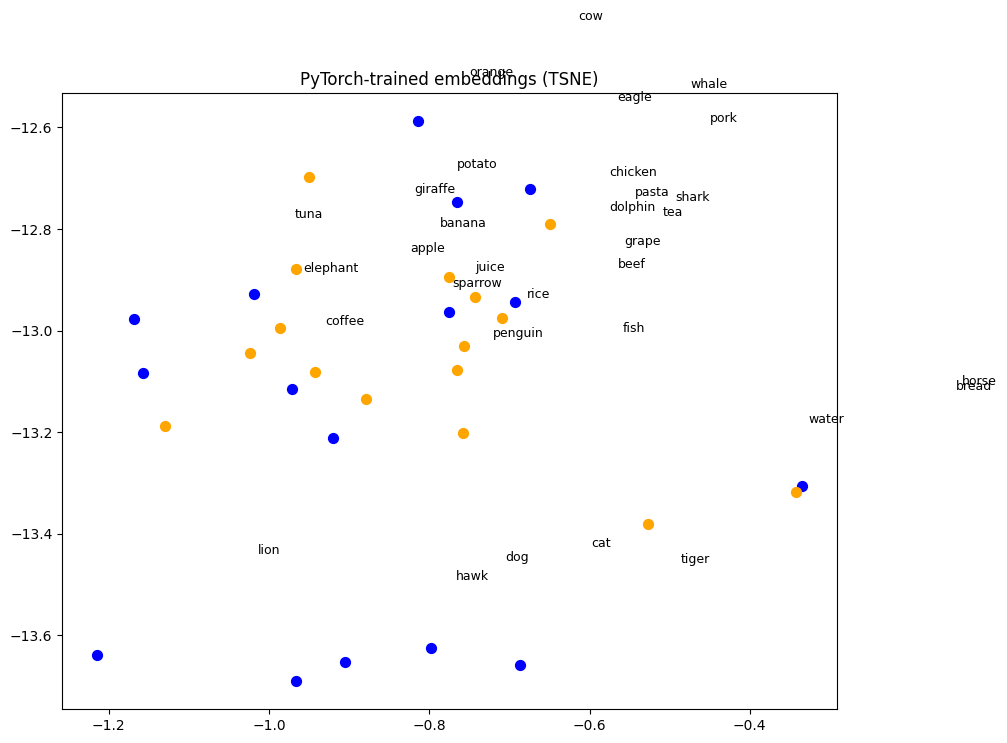

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


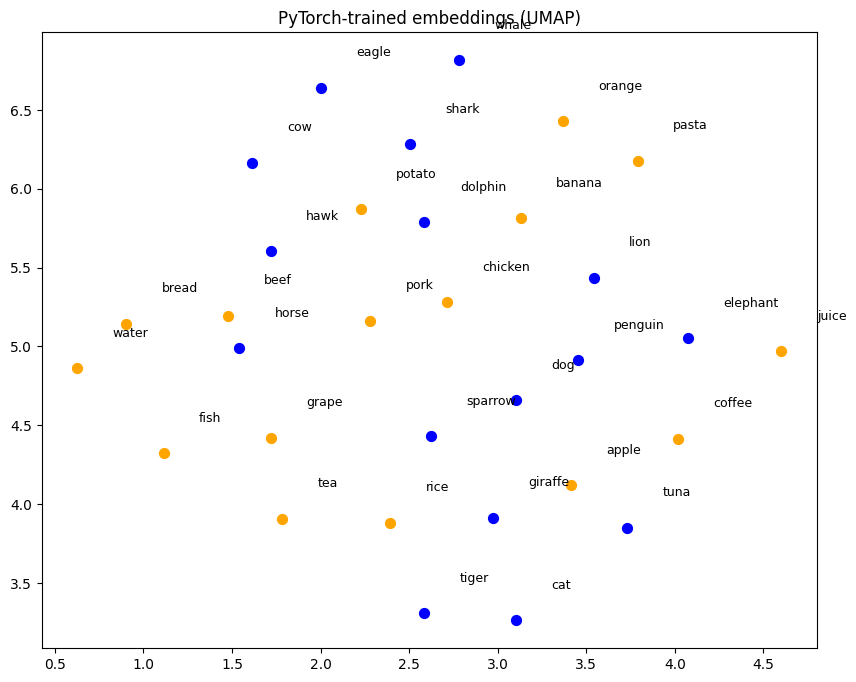

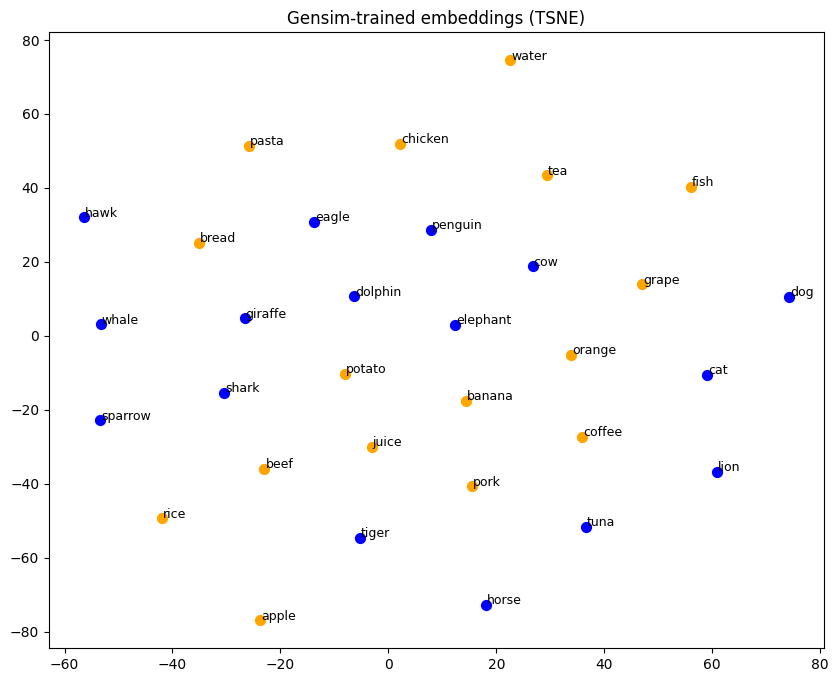

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


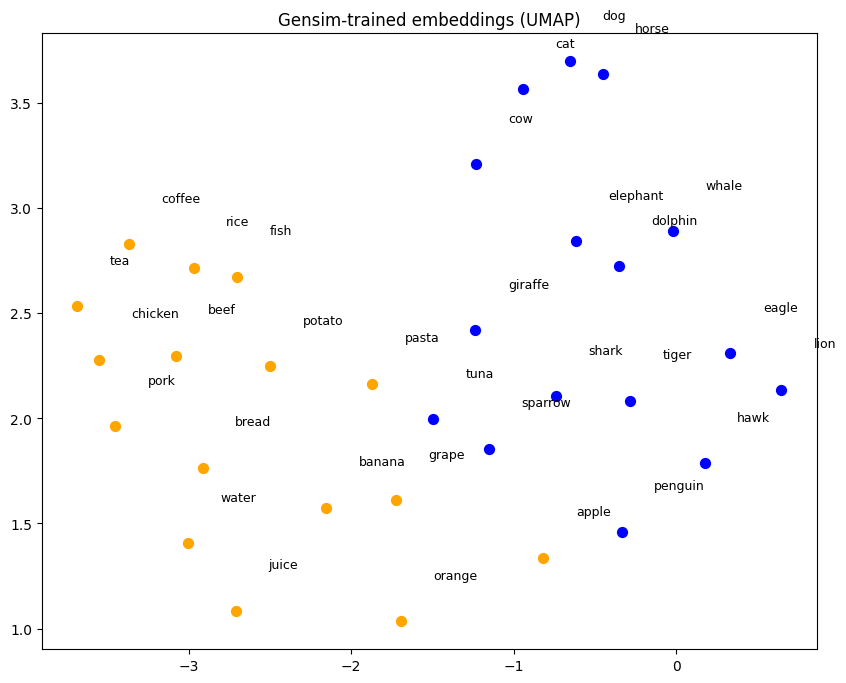

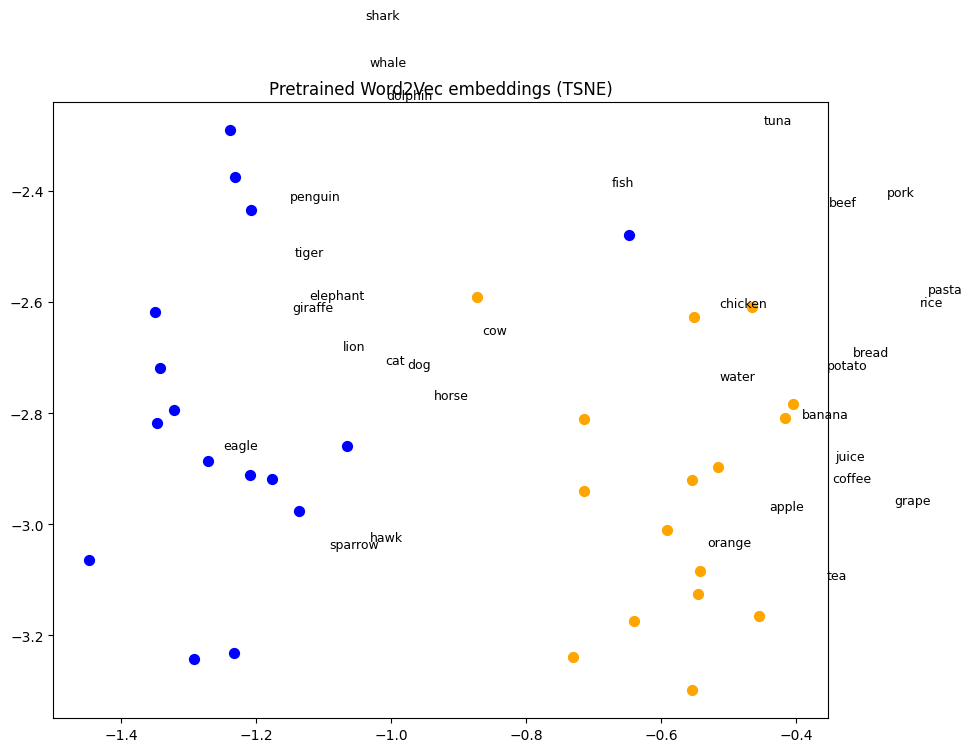

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


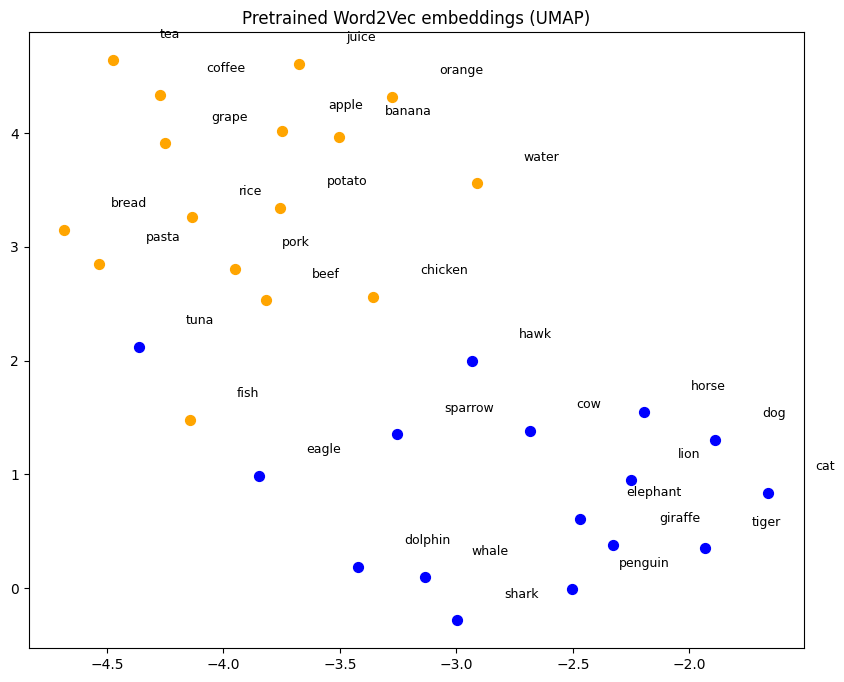

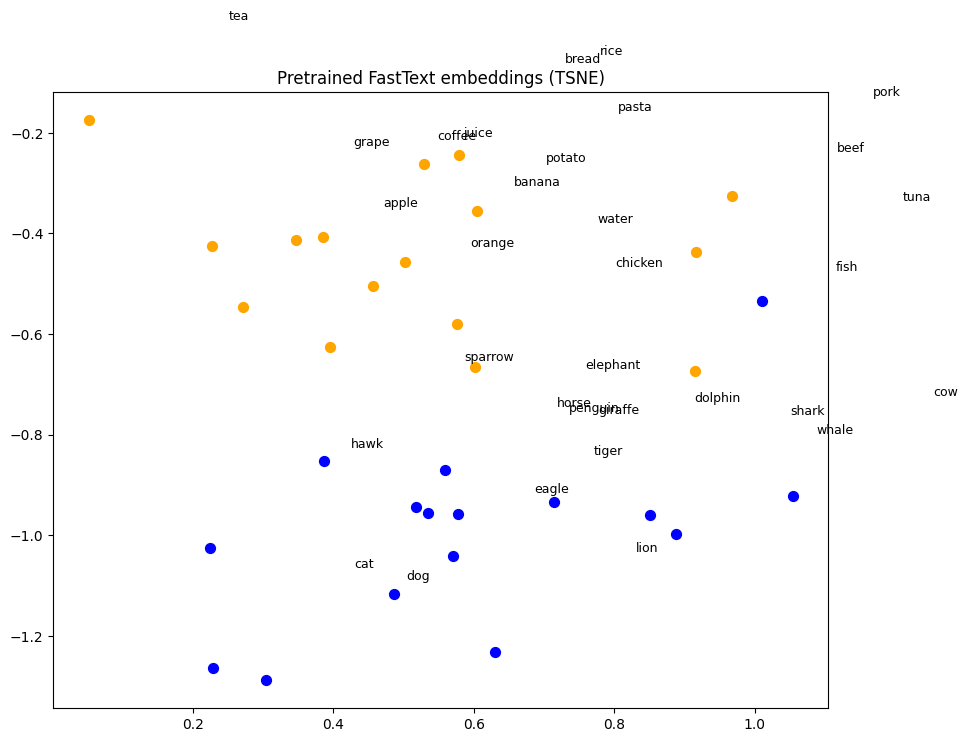

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


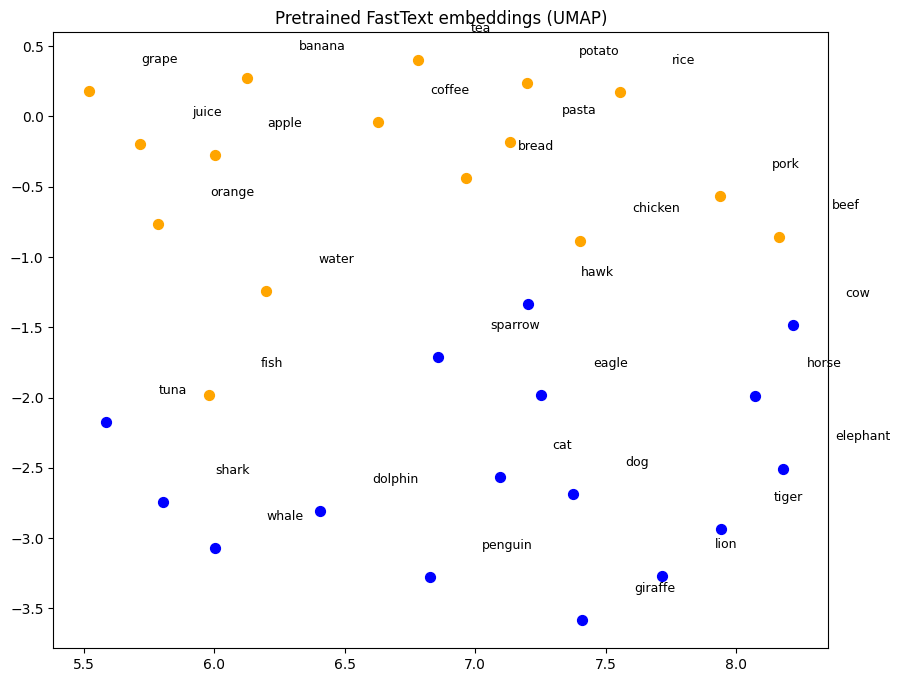

In [21]:
# Embedding visualization
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]
foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]
categories = {'animals': animals, 'foods': foods}
colors = {'animals': 'blue', 'foods': 'orange'}

def plot_embeddings(name, embeddings, word2idx=None, model_type='dict', method='tsne'):
    # Collect vectors and labels
    vectors = []
    labels = []
    color_list = []
    for cat, words in categories.items():
        for w in words:
            try:
                if model_type == 'dict':
                    idx = word2idx[w]
                    vec = embeddings[idx]
                elif model_type == 'gensim':
                    vec = embeddings[w]
                vectors.append(vec)
                labels.append(w)
                color_list.append(colors[cat])
            except KeyError:
                continue
    vectors = np.array(vectors)

    # Dimensionality reduction
    if method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=2, random_state=42)
    reduced = reducer.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(10,8))
    for i, label in enumerate(labels):
        plt.scatter(reduced[i,0], reduced[i,1], c=color_list[i], s=50)
        plt.text(reduced[i,0]+0.2, reduced[i,1]+0.2, label, fontsize=9)
    plt.title(f"{name} embeddings ({method.upper()})")
    plt.show()

# PyTorch-trained embeddings
plot_embeddings("PyTorch-trained", pt_embeddings, pt_word2idx, 'dict', 'tsne')
plot_embeddings("PyTorch-trained", pt_embeddings, pt_word2idx, 'dict', 'umap')

# Gensim-trained embeddings
plot_embeddings("Gensim-trained", gs_embeddings, gs_word2idx, 'dict', 'tsne')
plot_embeddings("Gensim-trained", gs_embeddings, gs_word2idx, 'dict', 'umap')

# Pretrained Word2Vec
plot_embeddings("Pretrained Word2Vec", w2v_google, model_type='gensim', method='tsne')
plot_embeddings("Pretrained Word2Vec", w2v_google, model_type='gensim', method='umap')

# Pretrained FastText
plot_embeddings("Pretrained FastText", ft_wiki, model_type='gensim', method='tsne')
plot_embeddings("Pretrained FastText", ft_wiki, model_type='gensim', method='umap')


## Answers for Part 7
1. Pretrained FastText performed the best because it assigned high cosine similarity scores to the two sentences that are semantically closest to the query (“The cat sat on the mat.” and “The feline was resting on the rug.”), while maintaining a clear separation between these sentences and the others in terms of cosine similarity. This is also evident from the t-SNE and UMAP visualizations, where it provides the clearest separation between the two categories of points (animals and foods).
2. Yes, pretrained embeddings were significantly better. This is mainly because pretrained models are trained on massive corpora, allowing them to learn richer semantic relationships that cannot be captured from a small training dataset.
3. The observed differences can be attributed to several factors, including training data size, vocabulary coverage, and model architecture. Pretrained embeddings benefit from large-scale corpora and richer semantic representations, while custom-trained embeddings are limited by data sparsity. Moreover, the use of simple averaging for sentence embeddings further amplifies the importance of high-quality word-level representations.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

In this assignment, I used AI to:
1. Assist with installing and importing packages such as Gensim and UMAP.
2. Help explain the syntax of functions in unfamiliar packages.
3. Verify the computational logic before generating .pkl files.
4. Explain the causes of code errors.
5. Refine the accuracy and fluency of my written responses.
